In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [35]:
videos = pd.read_csv("video.csv",index_col=0)
channels = pd.read_csv("channels.csv",index_col=0)

In [36]:
top_10_channels = channels.sort_values(by=['subscribers'],ascending=False)

In [37]:
top10=top_10_channels.head(10)

In [56]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

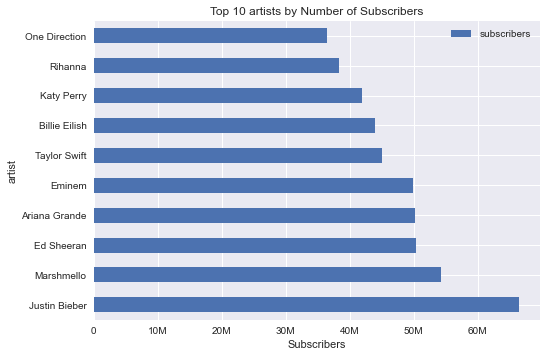

In [115]:
top10.plot(kind='barh',x='channel_name',y='subscribers')
plt.xlabel("Subscribers")
plt.ylabel("artist")
plt.title("Top 10 artists by Number of Subscribers")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(reformat_large_tick_values))

In [63]:
top_10_views = channels.sort_values(by=['viewers'],ascending=False)
top10v=top_10_views.head(10)

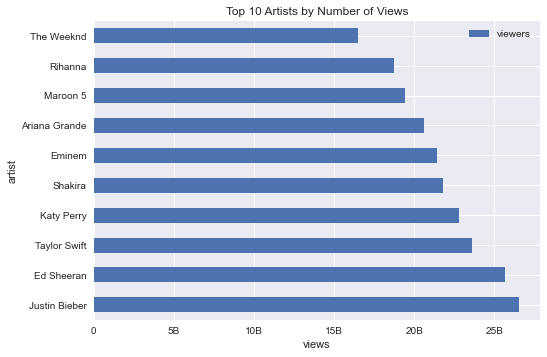

In [116]:
top10v.plot(kind='barh',x='channel_name',y='viewers')
plt.xlabel("views")
plt.ylabel("artist")
plt.title("Top 10 Artists by Number of Views")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(reformat_large_tick_values))

In [67]:
genres_df = pd.read_csv("C:\\Users\\Rafic Srouji\\MSBA 305\\BillBoard\\genres.csv",index_col=0)

In [70]:
artist_genre = dict()
for i in range(len(genres_df)):
    artist_genre[genres_df['artist'][i]] = genres_df['genre'][i]

In [79]:
channels['genre']= None
for i in range(len(channels)):
    for j in artist_genre.keys():
        if channels['channel_name'][i] == j :
            channels['genre'][i] = artist_genre[j]

<ipython-input-79-c9d5196cf65b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channels['genre'][i] = artist_genre[j]


In [114]:
channels.to_csv("channels.csv")

In [83]:
genres_yt=channels[['genre','viewers','subscribers']].groupby('genre').sum()

In [91]:
genres_yt['genres'] = None
for i in range(len(genres_yt)):
    genres_yt['genres'][i] = genres_yt.index[i]

<ipython-input-91-3e9c81c072b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_yt['genres'][i] = genres_yt.index[i]


In [110]:
genres_yt=genres_yt.sort_values(by='viewers',ascending=False)

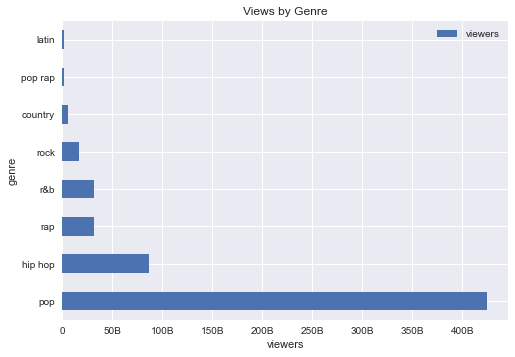

In [117]:
genres_yt.plot(kind='barh',x='genres',y='viewers')
plt.xlabel("viewers")
plt.ylabel("genre")
plt.title("Views by Genre")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(reformat_large_tick_values))

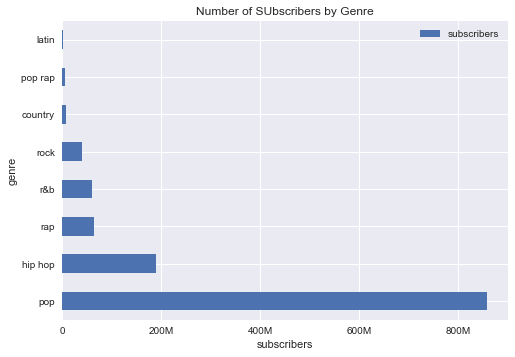

In [118]:
genres_yt=genres_yt.sort_values(by='subscribers',ascending=False)
genres_yt.plot(kind='barh',x='genres',y='subscribers')
plt.xlabel("subscribers")
plt.ylabel("genre")
plt.title("Number of SUbscribers by Genre")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(reformat_large_tick_values))